# 2.1 A First Look at Neural Networks

In [5]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])

model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

test_digits = test_images[:10]
predictions = model.predict(test_digits);
print(predictions[0])
print(predictions[0].argmax(), test_labels[0])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Accurace: {test_acc}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8746 - loss: 0.4416
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9654 - loss: 0.1159
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9788 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9849 - loss: 0.0504
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9890 - loss: 0.0388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
[1.9584339e-08 8.0365653e-10 7.5786363e-07 2.6337607e-06 7.0529312e-11
 1.2575332e-08 1.6029517e-12 9.9999577e-01 3.7105030e-09 7.1602977e-07]
7 7
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0714
Accurace: 0.9811000227928162


# 2.2 Data Representations for Neural Networds (Numpy Practice)

In [1]:
import numpy as np

In [2]:
x = np.array(12)
x

array(12)

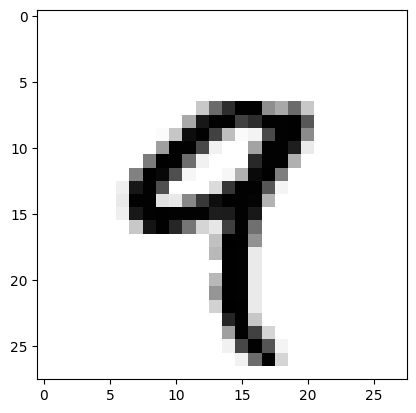

In [11]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

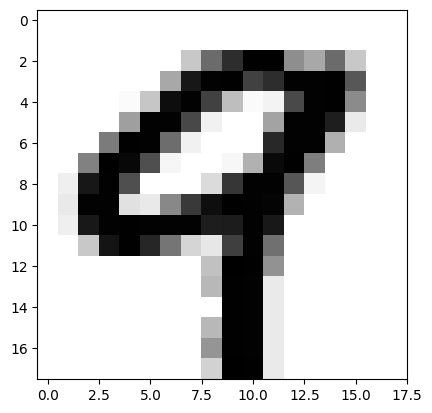

In [17]:
my_slice = train_images[:100, 5:-5, 5:-5]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

# 2.3 The Gears of Neural Networks

In [18]:
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(0, x[i, j])
  return x

def naive_add(x, y):
  assert len(x.shape) == 2;
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [23]:
x = np.random.random((6))
y = np.random.random((6))
z = x - y
w = np.maximum(z, 0) # Element-wise relu
print(x)
print(y)
print(z)
print(w)

[0.05111316 0.66563676 0.94145183 0.92527234 0.104028   0.49052185]
[0.90269889 0.94614831 0.41128186 0.27310316 0.73060377 0.51352895]
[-0.85158572 -0.28051154  0.53016996  0.65216918 -0.62657577 -0.0230071 ]
[0.         0.         0.53016996 0.65216918 0.         0.        ]


In [31]:
# Demo that how much is np otimized for machine learning things

import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()

for _ in range(1000):
  z = x + y
  z = np.maximum(z, 0)

print("np.maximum Took: {0:.2f} s".format(time.time() - t0))

x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()

for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)

print("naive_relu Took: {0:.2f} s".format(time.time() - t0))

np.maximum Took: 0.01 s
naive_relu Took: 1.83 s


In [52]:
x = np.random.random((32, 10))
y = np.random.random((10))
pdim = y.ndim
y = np.expand_dims(y, axis = 0)
pdim, y.shape, y.ndim, y

(1,
 (1, 10),
 2,
 array([[0.20448467, 0.78620612, 0.7059114 , 0.68257938, 0.02171163,
         0.03505657, 0.47643794, 0.1528352 , 0.65575342, 0.33034487]]))

In [54]:
y = np.concatenate([y] * 32, axis=0)
y.shape, y.ndim, y

((32, 320),
 2,
 array([[0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487],
        [0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487],
        [0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487],
        ...,
        [0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487],
        [0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487],
        [0.20448467, 0.78620612, 0.7059114 , ..., 0.1528352 , 0.65575342,
         0.33034487]]))

In [56]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [57]:
x = np.random.random((4, 4, 4));
y = np.random.random((4, 4))
z = np.maximum(x, y)
x, y, z

(array([[[0.92537868, 0.3789313 , 0.25635754, 0.42450222],
         [0.93169913, 0.74489482, 0.09935846, 0.92256558],
         [0.90314858, 0.22961915, 0.72728126, 0.70240997],
         [0.02240325, 0.23953178, 0.46377605, 0.88394206]],
 
        [[0.43566759, 0.83078132, 0.97396165, 0.74230425],
         [0.38061373, 0.56116452, 0.43187575, 0.64825035],
         [0.47829816, 0.69494317, 0.46638757, 0.3349628 ],
         [0.53284105, 0.84916119, 0.86594692, 0.83050335]],
 
        [[0.52871672, 0.58254976, 0.80582578, 0.55059477],
         [0.64008972, 0.09821779, 0.56809378, 0.22912571],
         [0.82744296, 0.16674043, 0.84471541, 0.9000877 ],
         [0.53883629, 0.47063235, 0.43136122, 0.385156  ]],
 
        [[0.23612585, 0.84385323, 0.23106446, 0.4665358 ],
         [0.92355077, 0.85336664, 0.28613273, 0.04671715],
         [0.08144991, 0.23491978, 0.92894418, 0.52663961],
         [0.19537712, 0.37347647, 0.80765857, 0.95343892]]]),
 array([[0.40113658, 0.77240603, 0.91641398,

In [68]:
def naive_vector_dot(x, y):
  assert len(y.shape) == 1
  assert len(x.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = np.zeros((x.shape[0]))
  for i in range(x.shape[0]):
    z[i] += x[i] * y[i]
  return z

In [69]:
x = np.random.random((5))
y = np.random.random((5))
x, y, naive_vector_dot(x, y)

(array([0.86185876, 0.07731238, 0.00755778, 0.81614024, 0.16023589]),
 array([0.44768704, 0.43192573, 0.71380647, 0.12650674, 0.11937477]),
 array([0.38584299, 0.03339321, 0.00539479, 0.10324724, 0.01912812]))

In [70]:
def naive_matrix_dot(x, y):
  assert len(x.shape) == 2;
  assert len(y.shape) == 2;
  assert x.shape[1] == y.shape[0]
  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[0]):
      row_x = x[i, :]
      col_y = y[:, j]
      z[i, j] = naive_vector_dot(x, y)
  return z

In [72]:
x = np.random.random((4, 5))
y = x.reshape((2, 10))
z = x.reshape((20))
x, x.shape, y, y.shape, z, z.shape

(array([[0.15191134, 0.58649333, 0.32856327, 0.59166392, 0.51298244],
        [0.22037144, 0.44630627, 0.82305448, 0.56241021, 0.0048309 ],
        [0.28091268, 0.64677057, 0.05105322, 0.69459006, 0.21121383],
        [0.82157014, 0.4827287 , 0.22945688, 0.71470152, 0.67688023]]),
 (4, 5),
 array([[0.15191134, 0.58649333, 0.32856327, 0.59166392, 0.51298244,
         0.22037144, 0.44630627, 0.82305448, 0.56241021, 0.0048309 ],
        [0.28091268, 0.64677057, 0.05105322, 0.69459006, 0.21121383,
         0.82157014, 0.4827287 , 0.22945688, 0.71470152, 0.67688023]]),
 (2, 10),
 array([0.15191134, 0.58649333, 0.32856327, 0.59166392, 0.51298244,
        0.22037144, 0.44630627, 0.82305448, 0.56241021, 0.0048309 ,
        0.28091268, 0.64677057, 0.05105322, 0.69459006, 0.21121383,
        0.82157014, 0.4827287 , 0.22945688, 0.71470152, 0.67688023]),
 (20,))

# 2.4 The Engine of neural Networks: Gradient-based Optimization

In [73]:
# I am trying to find minimum value of a function using gradient descent
def f(x):
  return x**2 + 5*x + 4

def gradient(x):
  return 2*x + 5

x = 10
learning_rate = 0.1
epochs = 100

for i in range(epochs):
  x = x - learning_rate * gradient(x)

x, f(x)

(-2.4999999974537053, -2.250000000000001)

In [102]:
# I am trying to find minimum value of a function using gradient descent (with gradient Tape)
import tensorflow as tf
def f(x):
  return x**2 + 5*x + 4

x = tf.Variable(10.)
learning_rate = 0.1
epochs = 100

for i in range(epochs):
  with tf.GradientTape() as tape:
    y = f(x)
  grad = tape.gradient(y, x)
  x.assign_sub(learning_rate * grad)

print(np.float32(x.numpy()), f(np.float32(x.numpy())))

-2.4999995 -2.2500005


In [99]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
  y = 2 * x + 3
grad = tape.gradient(y, x)
print(x, y, grad)
print()
print(x.numpy(), y.numpy(), grad.numpy())

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.13959014, 0.00710332],
       [0.06162047, 0.6429424 ]], dtype=float32)> tf.Tensor(
[[3.2791803 3.0142066]
 [3.123241  4.285885 ]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)

[[0.13959014 0.00710332]
 [0.06162047 0.6429424 ]] [[3.2791803 3.0142066]
 [3.123241  4.285885 ]] [[2. 2.]
 [2. 2.]]


In [107]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2)))
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b
tape.gradient(y, [W, b])

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.3270615, 1.3270615],
        [1.5146686, 1.5146686]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

# 2.5 Looking back at the first Example

In [134]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1e-1)
    self.W = tf.Variable(w_initial_value)

    b_shape = (output_size, )
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs):
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):
    return [self.W, self.b]


class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights


model = NaiveSequential([
    NaiveDense(input_size = 28 * 28, output_size = 512, activation = tf.nn.relu),
    NaiveDense(input_size = 512, output_size = 10, activation = tf.nn.softmax)
])
assert len(model.weights) == 4


import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size):
    assert len(images) == len(labels)
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.index = 0
    self.num_batches = math.ceil(len(images) / batch_size)

  def next(self):
    images = self.images[self.index : self.index + self.batch_size]
    labels = self.labels[self.index : self.index + self.batch_size]
    self.index += self.batch_size
    return images, labels


def one_training_step(model, images_batch, labels_batch):
  with tf.GradientTape() as tape:
    predictions = model(images_batch)
    per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
    average_loss = tf.reduce_mean(per_sample_losses)
  gradients = tape.gradient(average_loss, model.weights)
  update_weights(gradients, model.weights)
  return average_loss

# learning_rate = 1e-3
#
# def update_weights(gradients, weights):
#   for g, w in zip(gradients, weights):
#     w.assign_sub(learning_rate * g)

# In practice, we should not update weights by hand, instead we should use the Keras

from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate = 1e-3)

def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))


def fit(model, images, labels, epochs, batch_size = 128):
  for epoch_counter in range(epochs):
    print(f"Epoch {epoch_counter}")
    batch_generator = BatchGenerator(images, labels, batch_size)
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter % 100 == 0:
        print(f"loss at batch {batch_counter}: {loss:.2f}")


fit(model, train_images, train_labels, epochs = 10)


predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis = 1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

Epoch 0
loss at batch 0: 6.63
loss at batch 100: 2.23
loss at batch 200: 2.19
loss at batch 300: 2.10
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.90
loss at batch 100: 1.87
loss at batch 200: 1.82
loss at batch 300: 1.73
loss at batch 400: 1.82
Epoch 2
loss at batch 0: 1.58
loss at batch 100: 1.57
loss at batch 200: 1.49
loss at batch 300: 1.43
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.32
loss at batch 100: 1.34
loss at batch 200: 1.23
loss at batch 300: 1.21
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.13
loss at batch 100: 1.16
loss at batch 200: 1.03
loss at batch 300: 1.05
loss at batch 400: 1.09
Epoch 5
loss at batch 0: 0.98
loss at batch 100: 1.02
loss at batch 200: 0.89
loss at batch 300: 0.93
loss at batch 400: 0.97
Epoch 6
loss at batch 0: 0.87
loss at batch 100: 0.91
loss at batch 200: 0.79
loss at batch 300: 0.84
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.83
loss at batch 200: 0.71
loss at batch 300: 0.77
loss at batch 40